# Methods for Portfolio Optimization

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import linprog
from tabulate import tabulate

### Function

In [2]:
# Funzione per calcolare il rendimento di un portafoglio
def portfolio_return(weights, mean_returns):
    return np.dot(weights.T, mean_returns)

# Funzione per calcolare il rischio (varianza) di un portafoglio
def portfolio_risk(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Funzione per minimizzare il rischio dato un livello di rendimento atteso
def minimize_risk(weights, mean_returns, cov_matrix, target_return):
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x, mean_returns) - target_return},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(len(mean_returns)))
    result = minimize(portfolio_risk, len(mean_returns) * [1. / len(mean_returns)], args=(cov_matrix,), 
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def generate_random_array(n):
    random_nums = np.random.rand(n)
    total = np.sum(random_nums)
    random_array = random_nums / total
    return random_array

def calculate_annual_return(weekly_mean_return):
    
    # Convert the weekly mean return from percentage to decimal
    weekly_return_decimal = weekly_mean_return / 100
    
    # Calculate the annual return using the compound interest formula
    annual_return_decimal = (1 + weekly_return_decimal) ** 52 - 1
    
    # Convert the annual return back to percentage
    annual_return_percentage = annual_return_decimal * 100
    
    return annual_return_percentage

## Dataset
https://www.francescocesarone.com/data-sets


### Ftse100

FTSE100 FOLDER

The folder contains the weekly linear returns for the Ftse100 from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_Ftse100' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_Ftse100' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [94]:
PORTFOLIO = 'Ftse100'

mat_file_1 = 'Ftse100/IndRet_Ftse100.mat'
mat_file_2 = 'Ftse100/RR_Ftse100.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_ftse100'].flatten()
matrix_ret = mat_data_1['Ret_ftse100']
matrix_rr = mat_data_2['RR']

# Calcola i rendimenti medi e la matrice di covarianza
mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(nStocks)

63


### Stoxx50

EUROSTOXX50 FOLDER

The folder contains the weekly linear returns for the Eurostoxx50 from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_Stoxx50' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_Stoxx50' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [124]:
PORTFOLIO = 'EuroStoxx50'

mat_file_1 = 'EuroStoxx50/IndRet_Stoxx50.mat'
mat_file_2 = 'EuroStoxx50/RR_Stoxx50.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_stoxx50'].flatten()
matrix_ret = mat_data_1['Ret_stoxx50']
matrix_rr = mat_data_2['RR']

# Calcola i rendimenti medi e la matrice di covarianza
mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(nStocks)

32


### FTSE Mib

The folder contains the weekly linear returns for the FtseMib from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_FtseMib' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_FtseMib' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [5]:
PORTFOLIO = 'FSTE Mib'

mat_file_1 = 'FtseMib/IndRet_FtseMib.mat'
mat_file_2 = 'FtseMib/RR_FtseMib.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_ftsemib'].flatten()
matrix_ret = mat_data_1['Ret_ftsemib']
matrix_rr = mat_data_2['RR']

# Calcola i rendimenti medi e la matrice di covarianza
mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(nStocks)

34


## Analytics

Index Name: EuroStoxx50
N. Stock: 32


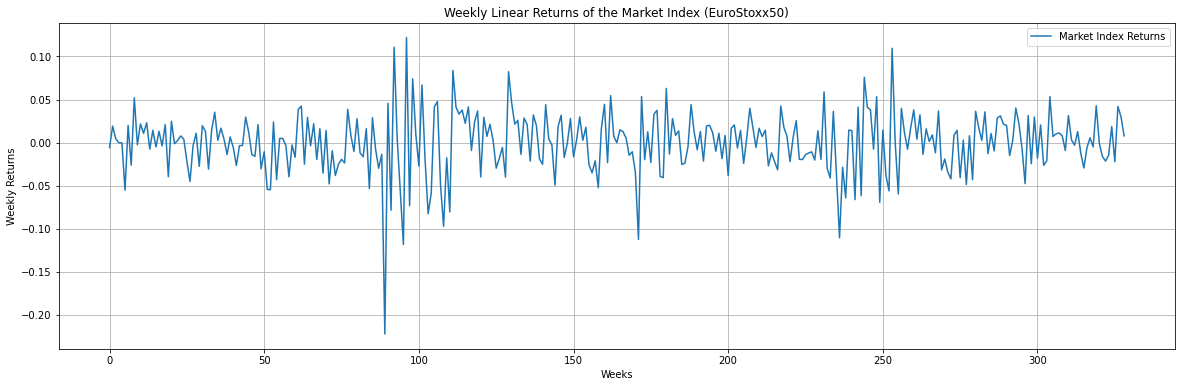

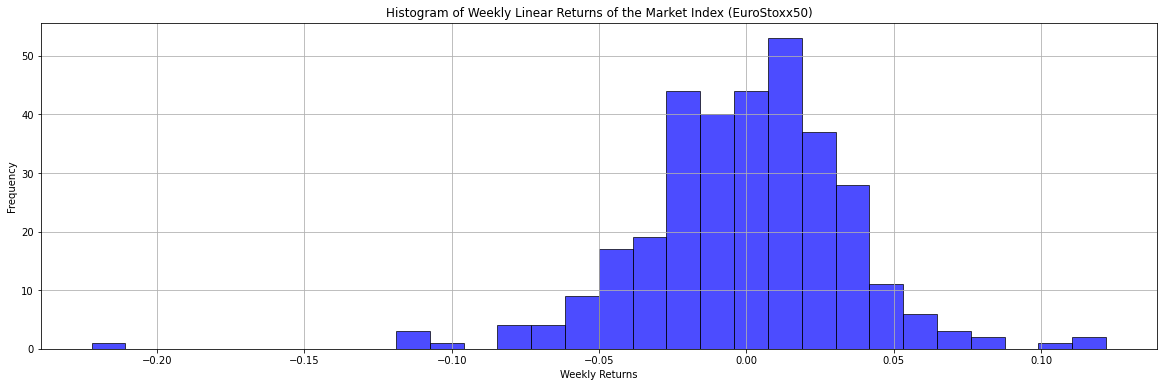

In [125]:
print(f"Index Name: {PORTFOLIO}")
print(f"N. Stock: {nStocks}")

# Grafico del rendimento settimanale dell'indice di mercato
plt.figure(figsize=(20, 6))
plt.plot(array_ret, label='Market Index Returns')
plt.xlabel('Weeks')
plt.ylabel('Weekly Returns')
plt.title('Weekly Linear Returns of the Market Index (EuroStoxx50)')
plt.legend()
plt.grid(True)
plt.show()

# Istogramma dei rendimenti settimanali del mercato
plt.figure(figsize=(20, 6))
plt.hist(array_ret, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Weekly Linear Returns of the Market Index (EuroStoxx50)')
plt.grid(True)
plt.show()

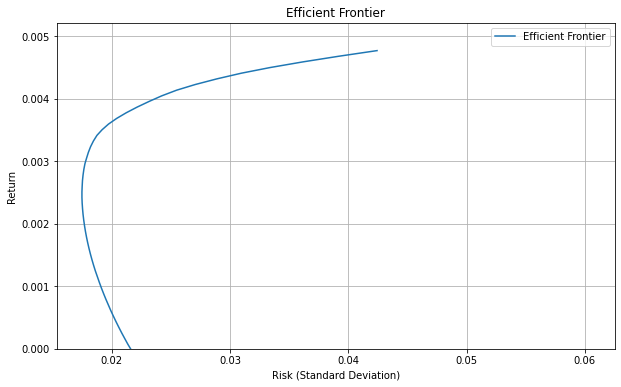

In [126]:
# Calcola la frontiera efficiente
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
efficient_portfolios = []

for target_return in target_returns:
    efficient_portfolios.append(minimize_risk(len(mean_returns) * [1. / len(mean_returns)], mean_returns, cov_matrix, target_return))

# Estrai i rischi e i rendimenti dei portafogli efficienti
risks = [portfolio_risk(x['x'], cov_matrix) for x in efficient_portfolios]
returns = [portfolio_return(x['x'], mean_returns) for x in efficient_portfolios]

# Visualizza la frontiera efficiente
plt.figure(figsize=(10, 6))
plt.plot(risks, returns, label='Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.ylim(0) 
plt.legend()
plt.grid(True)
plt.show()

In [127]:
# Plotting Function
def plot_results(loss_values, grad_values, returns_iteration, optimal_weights, label):
    # Plotting the metrics
    plt.figure(figsize=(20, 5))

    # Loss Function Values
    plt.subplot(1, 3, 1)
    plt.plot(loss_values)
    plt.title('Objective Function Value')
    plt.xlabel('Iteration')
    plt.ylabel('Value')

    # Norm Gradient Values
    plt.subplot(1, 3, 2)
    plt.plot(grad_values)
    plt.title('Norm Gradient Value')
    plt.xlabel('Iteration')
    plt.ylabel('Value')

    plt.subplot(1, 3, 3)
    plt.plot(returns_iteration, label=label)
    plt.title('Return over Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Return Mean')
    plt.legend()

    ret_mean_aw = checkMeanRet(optimal_weights, mean_returns) * 100
    risk_aw = portfolio_risk(optimal_weights, cov_matrix)

    print('\n' + PORTFOLIO)
    print(f"Max Weights: {np.max(optimal_weights)}")
    print("Sum of weights:", np.sum(optimal_weights))
    print('Weekly Return Portfolio: ', np.round(ret_mean_aw, 5), "%")
    print('Yearly Return Portfolio: ', calculate_annual_return(ret_mean_aw), "%")
    print("Risk: ", np.round(risk_aw,3), "%")

    # Plotting the histogram
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(optimal_weights)), optimal_weights, color='skyblue')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Histogram of weights')
    plt.xticks(range(len(optimal_weights)), labels=[f'Element {i+1}' for i in range(len(optimal_weights))])
    plt.grid(axis='y')

    # Display the plot
    plt.tight_layout()
    plt.show()

## Portfolio Optimizations

We have $n$ avaiable assets. We call $w_i$ the quantity of money invested on the
$i$-th asset during the considered period and with $r_i$ the returns on the $i$-th
asset. We have two different constraints. The first one is non-negativity for the
variables (i.e., $w_i$ ≥ 0). It basically means that short selling (selling asset that
we still don’t own) is not allowed. We then have the budget constraint:

$
\begin{equation}
\sum_{i=1}^{n} w_i = B
\end{equation}
$

the total amount of money invested needs to be equal to the budget $B$ ($B$ can be simply set to 1).
Consider a stochastic model for the returns: $r ∈ R^n$ is a randomly generated vector with mean $\overline{r}$ and covariance $\Sigma$. Thus expected return will be:
$
\begin{equation}
\overline{r}^\intercal \, w
\end{equation}
$
and variance (risk)
$
\begin{equation}
w^\intercal \, \Sigma \, w
\end{equation}
$
Classic portfolio problem, described by Markowitz (1952), is a convex quadratic programming problem:
$
\begin{equation}
\begin{split}
\underset{w∈R^n}{min} \quad \gamma \, w^\intercal \, \Sigma \, w - \overline{r}^\intercal \, w \\
s.t. \quad e^\intercal w = 1 \\
w > 0
\end{split}
\end{equation} 
$
with $\gamma$ > 0 risk-aversion parameter. Goal is thus finding the set of assets that
minimizes the variance (risk connected to the given portfolio) while maximizing
the expected return (we obviously need to satisfy budget and non-negativity
constraints).

In [128]:
def checkMeanRet(weights, ret_mean):
    return np.dot(ret_mean.T, weights)

def loss(weights, ret_mean, cov, RISK_AVERSION):
    return  np.dot(RISK_AVERSION, np.dot(weights.T, np.dot(cov, weights))) -  np.dot(ret_mean.T, weights)

### Gradient

$
\begin{equation}
\nabla f(w_k) = 2 \, \gamma \, \Sigma \, w - \overline{r}^\intercal\\
\end{equation} 
$

In [129]:
def gradient(weights, ret_mean, cov, RISK_AVERSION):
    return  RISK_AVERSION * 2 * np.dot(weights, cov) -  ret_mean.T

## Frank-Wolfe and Pairwise Frank-Wolfe over the Markowitz portfolio problems

### Frank-Wolfe

In [130]:
RISK_AVERSION = 3

In [131]:
def linear_solver2(grad):
    c = grad # Use the positive gradient for minimization
    A_eq = np.ones((1, nStocks))
    b_eq = np.array([1])
    bounds = [(0, 1) for _ in range(nStocks)]
    res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
    return res.x

def linear_solver(grad):
    """
    Linear Minimization Oracle (LMO) without using linprog.
    """
    s = np.zeros_like(grad)
    s[np.argmin(grad)] = 1  # Set the position with the smallest gradient to 1
    return s


def duality_gap(weights, grad):
    """
    Compute the duality gap for the given weights and gradient.
    """
    s = linear_solver(grad)
    return np.dot(grad, weights - s)

05% - ret 00.08% - loss -0.001170
10% - ret 00.29% - loss -0.001577
15% - ret 00.32% - loss -0.001673
20% - ret 00.38% - loss -0.002046
25% - ret 00.35% - loss -0.002273
30% - ret 00.36% - loss -0.002181
35% - ret 00.34% - loss -0.002272
40% - ret 00.35% - loss -0.002306
45% - ret 00.35% - loss -0.002283
50% - ret 00.37% - loss -0.002353
55% - ret 00.38% - loss -0.002382
60% - ret 00.36% - loss -0.002394
65% - ret 00.37% - loss -0.002398
70% - ret 00.36% - loss -0.002405
75% - ret 00.37% - loss -0.002385
80% - ret 00.38% - loss -0.002402
85% - ret 00.37% - loss -0.002410
90% - ret 00.37% - loss -0.002412
95% - ret 00.37% - loss -0.002397

EuroStoxx50
Max Weights: 0.3477269385526511
Sum of weights: 1.0
Weekly Return Portfolio:  0.36113 %
Yearly Return Portfolio:  20.61698206095981 %
Risk:  0.02 %


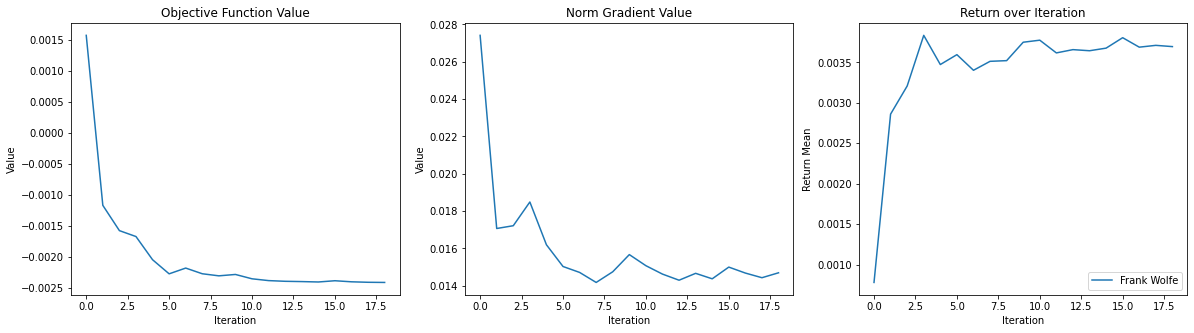

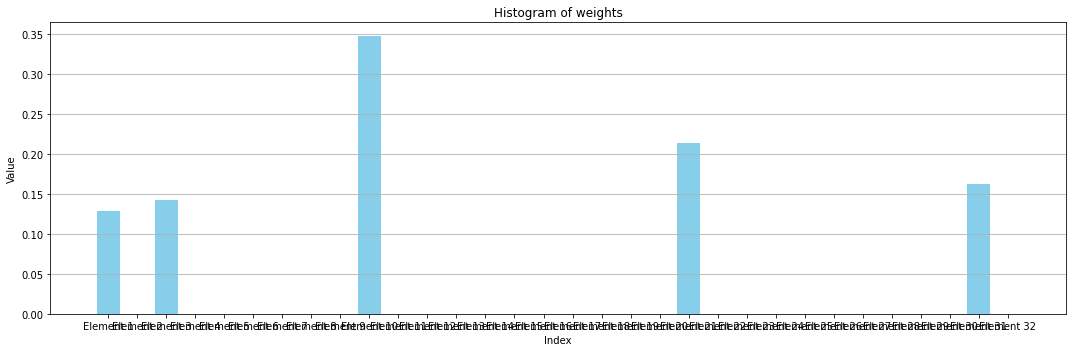

CPU times: user 1.25 s, sys: 79 ms, total: 1.32 s
Wall time: 929 ms


In [132]:
%%time

ITERATIONS = 20

weights = generate_random_array(nStocks)

loss_values_fw = []
grad_values_fw = []
returns_iteration_fw = []

for itr in range(1, ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)
    s = linear_solver(grad)

    # Store values for plotting
    loss_values_fw.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    grad_values_fw.append(np.linalg.norm(grad))
    returns_iteration_fw.append(checkMeanRet(weights, mean_returns))

    gamma = 2 / (itr + 2) 
    weights = (1 - gamma) * weights + gamma * s
    current_loss = loss(weights, mean_returns, cov_matrix, RISK_AVERSION)

    if abs(duality_gap(weights, grad)) < 1e-6: 
        print('Duality Gap Convergence itr: ', itr)
        break 

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_fw[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f}")

optimal_weights_fw = weights

plot_results(loss_values_fw, grad_values_fw, returns_iteration_fw, optimal_weights_fw, 'Frank Wolfe')

### Frank Wolfe Line Search

00% - ret 00.10% - loss -0.001638
05% - ret 00.39% - loss -0.002208
10% - ret 00.38% - loss -0.002324
15% - ret 00.39% - loss -0.002420
20% - ret 00.37% - loss -0.002430
25% - ret 00.36% - loss -0.002432
30% - ret 00.37% - loss -0.002434
35% - ret 00.37% - loss -0.002435
40% - ret 00.37% - loss -0.002435
45% - ret 00.37% - loss -0.002435
50% - ret 00.37% - loss -0.002435
55% - ret 00.37% - loss -0.002435
60% - ret 00.37% - loss -0.002436
65% - ret 00.37% - loss -0.002436
70% - ret 00.37% - loss -0.002436
75% - ret 00.37% - loss -0.002436
80% - ret 00.37% - loss -0.002436
85% - ret 00.37% - loss -0.002436
90% - ret 00.37% - loss -0.002436
95% - ret 00.37% - loss -0.002436

EuroStoxx50
Max Weights: 0.412692416079072
Sum of weights: 1.0
Weekly Return Portfolio:  0.36757 %
Yearly Return Portfolio:  21.019861820199658 %
Risk:  0.02 %


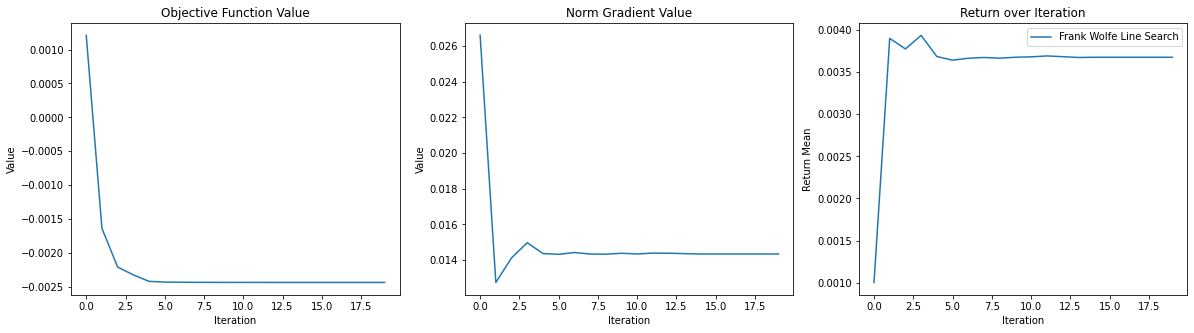

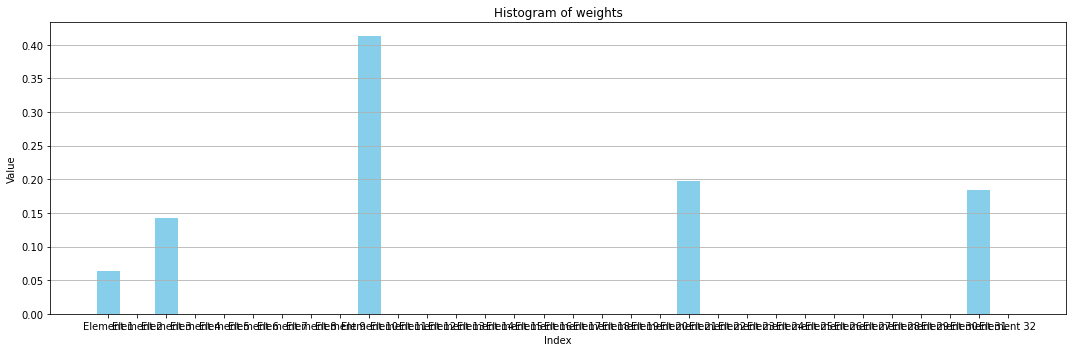

In [133]:
def line_search(weights, direction, ret_mean, cov_matrix, RISK_AVERSION):
    gamma_range = np.linspace(0, 1, 100)
    losses = [loss((1 - gamma) * weights + gamma * direction, ret_mean, cov_matrix, RISK_AVERSION) for gamma in gamma_range]
    optimal_gamma = gamma_range[np.argmin(losses)]
    return optimal_gamma

ITERATIONS = 20

loss_values_ls = []
grad_values_ls = []
returns_iteration_ls = []

weights = np.ones(nStocks) / nStocks

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)
    s = np.zeros(nStocks)
    s[np.argmin(grad)] = 1

    # Store values for plotting
    loss_values_ls.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    grad_values_ls.append(np.linalg.norm(grad))
    returns_iteration_ls.append(checkMeanRet(weights, mean_returns))
    
    # Calcola il passo ottimale con la line search
    gamma = line_search(weights, s, mean_returns, cov_matrix, RISK_AVERSION)
    weights = (1 - gamma) * weights + gamma * s
    
    # Proiezione per assicurare che i pesi siano validi
    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)
    
    # Verifica la convergenza
    if np.linalg.norm(grad) < 1e-6:
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_ls[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f}")

# Esegui l'ottimizzazione
optimal_weights_ls = weights

plot_results(loss_values_ls, grad_values_ls, returns_iteration_ls, optimal_weights_ls, 'Frank Wolfe Line Search')

### PairWise Frank Wolfe

00% - ret 00.10% - loss -0.000310
05% - ret 00.19% - loss -0.000772
10% - ret 00.27% - loss -0.001264
15% - ret 00.30% - loss -0.001556
20% - ret 00.31% - loss -0.001772
25% - ret 00.30% - loss -0.001952
30% - ret 00.32% - loss -0.001963
35% - ret 00.31% - loss -0.001999
40% - ret 00.35% - loss -0.002140
45% - ret 00.36% - loss -0.002193
50% - ret 00.36% - loss -0.002269
55% - ret 00.36% - loss -0.002310
60% - ret 00.35% - loss -0.002245
65% - ret 00.37% - loss -0.002313
70% - ret 00.38% - loss -0.002323
75% - ret 00.37% - loss -0.002363
80% - ret 00.38% - loss -0.002325
85% - ret 00.36% - loss -0.002330
90% - ret 00.34% - loss -0.002293
95% - ret 00.37% - loss -0.002372

EuroStoxx50
Max Weights: 0.4047591735872326
Sum of weights: 1.0
Weekly Return Portfolio:  0.37411 %
Yearly Return Portfolio:  21.4307827406381 %
Risk:  0.021 %


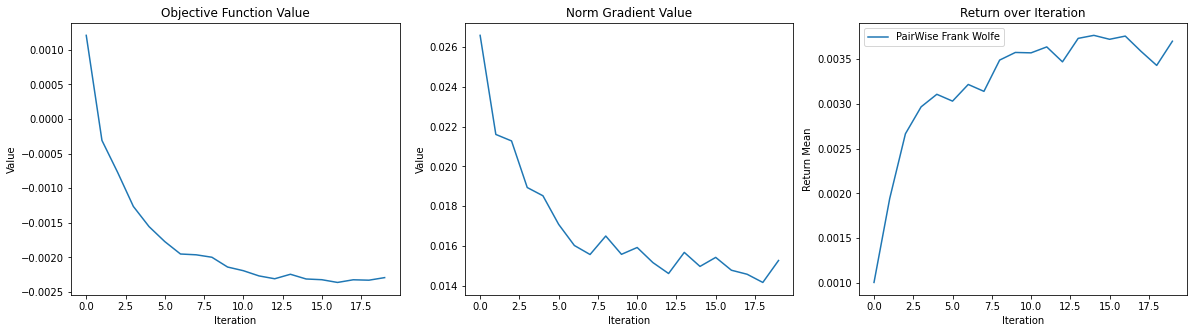

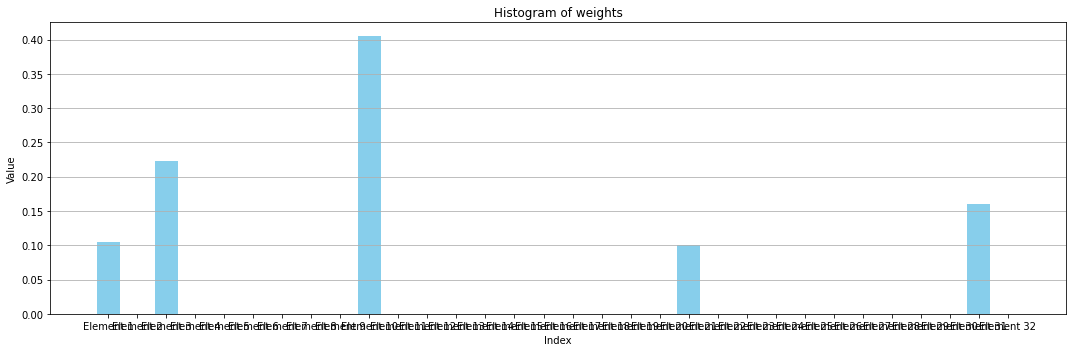

In [134]:
ITERATIONS = 20

loss_values_pw = []
grad_values_pw = []
returns_iteration_pw = []

weights = np.ones(nStocks) / nStocks

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)
    
    # Trova gli indici con il gradiente minimo e massimo
    i = np.argmin(grad)
    j = np.argmax(grad)

    # Store values for plotting
    loss_values_pw.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    grad_values_pw.append(np.linalg.norm(grad))
    returns_iteration_pw.append(checkMeanRet(weights, mean_returns))
    
    direction = np.zeros_like(weights)
    direction[i] = 1
    direction[j] = -1

    gamma = line_search(weights, direction, mean_returns, cov_matrix, RISK_AVERSION)

    weights += gamma * direction

    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)
    
    if np.linalg.norm(grad) < 1e-6:
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_pw[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f}")


# Esegui l'ottimizzazione con Pairwise Frank-Wolfe
optimal_weights_pw = weights

plot_results(loss_values_pw, grad_values_pw, returns_iteration_pw, optimal_weights_pw, 'PairWise Frank Wolfe')

### Away Step Frank Wolfe

00% - ret 00.10% - loss -0.001127
05% - ret 00.28% - loss -0.001497
10% - ret 00.29% - loss -0.002205
15% - ret 00.38% - loss -0.002276
20% - ret 00.38% - loss -0.002294
25% - ret 00.38% - loss -0.002302
30% - ret 00.38% - loss -0.002302
35% - ret 00.38% - loss -0.002302
40% - ret 00.38% - loss -0.002302
45% - ret 00.38% - loss -0.002302
50% - ret 00.38% - loss -0.002302
55% - ret 00.38% - loss -0.002302
60% - ret 00.38% - loss -0.002302
65% - ret 00.38% - loss -0.002302
70% - ret 00.38% - loss -0.002302
75% - ret 00.38% - loss -0.002302
80% - ret 00.38% - loss -0.002302
85% - ret 00.38% - loss -0.002302
90% - ret 00.38% - loss -0.002302
95% - ret 00.38% - loss -0.002302

EuroStoxx50
Max Weights: 0.6076792925857185
Sum of weights: 1.0
Weekly Return Portfolio:  0.38134 %
Yearly Return Portfolio:  21.886540266416056 %
Risk:  0.022 %


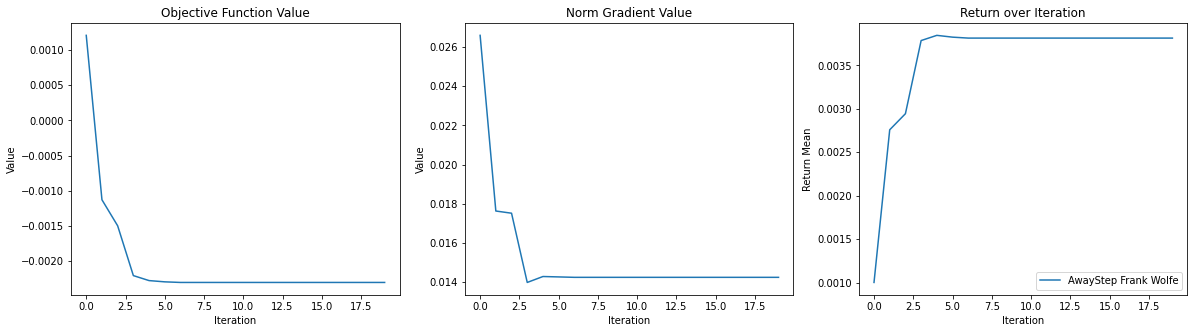

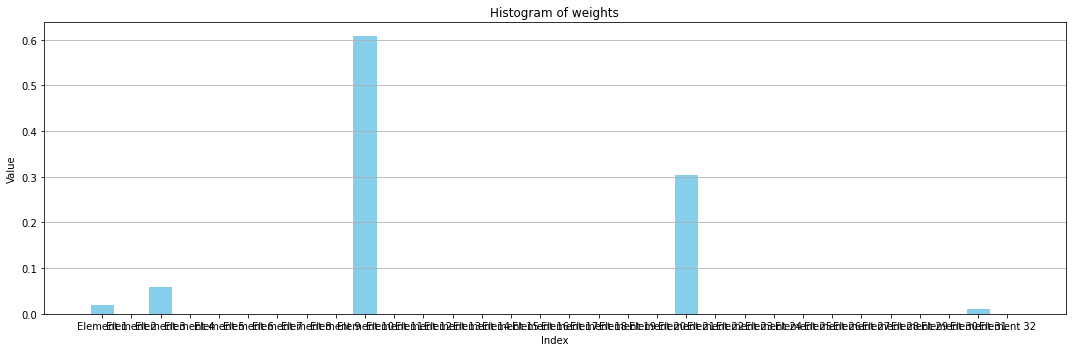

CPU times: user 1.11 s, sys: 50.4 ms, total: 1.16 s
Wall time: 610 ms


In [135]:
%%time

ITERATIONS = 20

loss_values_aw = []
grad_values_aw = []
returns_iteration_aw = []

weights = np.ones(nStocks) / nStocks
V = [weights.copy()]  # Memorizza i vertici visitati

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)
    
    # Direzione Frank-Wolfe
    s = linear_solver(grad)
    d_fw = s - weights
    
    # Direzione di allontanamento
    j = np.argmax(np.dot(V, grad))
    v_j = V[j]
    d_away = weights - v_j
    
    # Determina la direzione e il passo ottimali
    if np.dot(grad, d_fw) < np.dot(grad, d_away):
        direction = d_fw
        step_size = 1.0  # Frank-Wolfe step
    else:
        direction = -d_away
        max_step_size = np.min(weights[weights > 0] / (weights[weights > 0] - v_j[weights > 0]))
        step_size = min(1.0, max_step_size)  # Away step

    # Store values for plotting
    loss_values_aw.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    grad_values_aw.append(np.linalg.norm(grad))
    returns_iteration_aw.append(checkMeanRet(weights, mean_returns))

    gamma = line_search(weights, direction, mean_returns, cov_matrix, RISK_AVERSION)
    gamma = min(gamma, step_size)

    weights += gamma * direction
    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)
    
    # Aggiungi nuovo vertice
    if np.array_equal(direction, d_fw):
        V.append(s.copy())
    else:
        if step_size == max_step_size and len(V) > 1:
            V.pop(j)  # Rimuovi vertice

    if np.linalg.norm(grad) < 1e-6:
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_aw[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f}")
            

# Esegui l'ottimizzazione con Away-step Frank-Wolfe
optimal_weights_aw = weights

plot_results(loss_values_aw, grad_values_aw, returns_iteration_aw, optimal_weights_aw, 'AwayStep Frank Wolfe')

### Scipy Minimize Function


Ottimizzazione con scipy.optimize.minimize
Rendimento Atteso: 0.36814278069006895%
Perdita Ottimale: -0.0024270272248527215
Somma dei Pesi: 1.0
Risk:  0.02 %
32


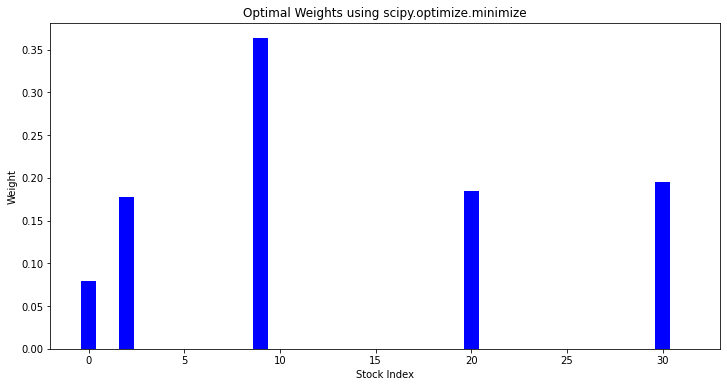

In [136]:
# Vincolo: la somma dei pesi deve essere 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Vincoli: i pesi devono essere tra 0 e 1
bounds = [(0, 1) for _ in range(nStocks)]

# Pesi iniziali
initial_weights = np.ones(nStocks) / nStocks

# Ottimizzazione con scipy.optimize.minimize
result = minimize(loss, initial_weights, args=(mean_returns, cov_matrix, RISK_AVERSION), method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_scipy = result.x

# Stampa dei risultati
print('\nOttimizzazione con scipy.optimize.minimize')
print(f"Rendimento Atteso: {checkMeanRet(optimal_weights_scipy, mean_returns)*100}%")
print(f"Perdita Ottimale: {loss(optimal_weights_scipy, mean_returns, cov_matrix, RISK_AVERSION)}")
print(f"Somma dei Pesi: {np.sum(optimal_weights_scipy)}")

risk = portfolio_risk(optimal_weights_scipy, cov_matrix)
print("Risk: ", np.round(risk,3), "%")

print(nStocks)
# Plot dell'istogramma dei pesi ottimali
plt.figure(figsize=(12, 6))
plt.bar(range(nStocks), optimal_weights_scipy, color='blue')
plt.xlabel('Stock Index')
plt.ylabel('Weight')
plt.title('Optimal Weights using scipy.optimize.minimize')
plt.show()

## Results Comparison

### Loss Comparison

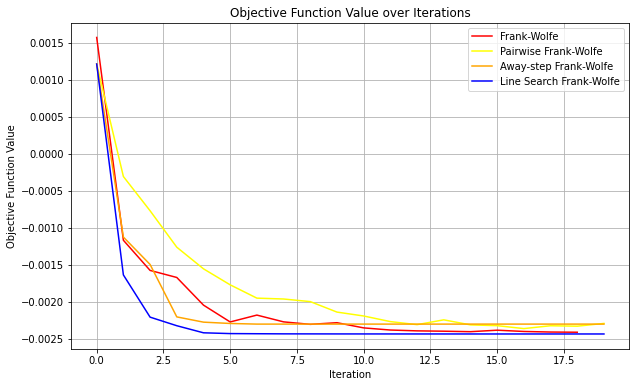

In [137]:
# Plot dei valori della funzione obiettivo
plt.figure(figsize=(10, 6))
plt.plot(loss_values_fw, label='Frank-Wolfe', color='red')
plt.plot(loss_values_pw, label='Pairwise Frank-Wolfe', color='yellow')
plt.plot(loss_values_aw, label='Away-step Frank-Wolfe', color='orange')
plt.plot(loss_values_ls, label='Line Search Frank-Wolfe', color='blue')

# Impostazioni del grafico
plt.title('Objective Function Value over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

### Efficent Frontier Comparison

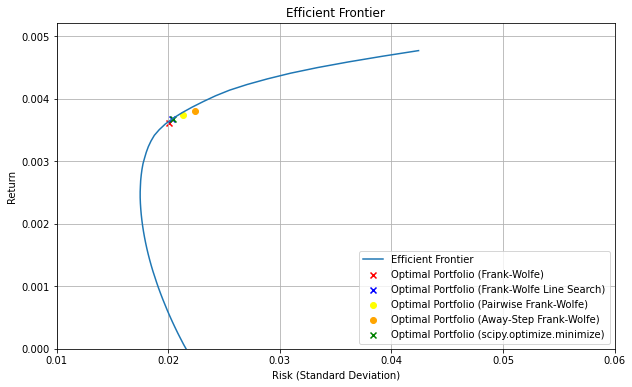

In [138]:
optimal_risk_fw = portfolio_risk(optimal_weights_fw, cov_matrix)
optimal_return_fw = portfolio_return(optimal_weights_fw, mean_returns)

optimal_risk_scipy = portfolio_risk(optimal_weights_scipy, cov_matrix)
optimal_return_scipy = portfolio_return(optimal_weights_scipy, mean_returns)

optimal_risk_linesearch = portfolio_risk(optimal_weights_ls, cov_matrix)
optimal_return_linesearch = portfolio_return(optimal_weights_ls, mean_returns)

optimal_risk_pw = portfolio_risk(optimal_weights_pw, cov_matrix)
optimal_return_pw = portfolio_return(optimal_weights_pw, mean_returns)

optimal_risk_aw = portfolio_risk(optimal_weights_aw, cov_matrix)
optimal_return_aw = portfolio_return(optimal_weights_aw, mean_returns)

# Genera la frontiera efficiente
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
efficient_portfolios = []

for target_return in target_returns:
    efficient_portfolios.append(minimize_risk(len(mean_returns) * [1. / len(mean_returns)], mean_returns, cov_matrix, target_return))

# Estrai i rischi e i rendimenti dei portafogli efficienti
risks = [portfolio_risk(x['x'], cov_matrix) for x in efficient_portfolios]
returns = [portfolio_return(x['x'], mean_returns) for x in efficient_portfolios]

# Visualizza la frontiera efficiente
plt.figure(figsize=(10, 6))
plt.plot(risks, returns, label='Efficient Frontier')
plt.scatter(optimal_risk_fw, optimal_return_fw, color='red', label='Optimal Portfolio (Frank-Wolfe)', marker='x')
plt.scatter(optimal_risk_linesearch, optimal_return_linesearch, color='blue', label='Optimal Portfolio (Frank-Wolfe Line Search)', marker='x')
plt.scatter(optimal_risk_pw, optimal_return_pw, color='yellow', label='Optimal Portfolio (Pairwise Frank-Wolfe)', marker='o')
plt.scatter(optimal_risk_aw, optimal_return_aw, color='orange', label='Optimal Portfolio (Away-Step Frank-Wolfe)', marker='o')
plt.scatter(optimal_risk_scipy, optimal_return_scipy, color='green', label='Optimal Portfolio (scipy.optimize.minimize)', marker='x')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.ylim(0) 
plt.xlim(0.01,0.06) 
plt.legend()
plt.grid(True)
plt.show()

### Risk and Return Comparison

In [139]:
# Converti i rendimenti settimanali in rendimenti annuali (approssimando 52 settimane in un anno)
def annualize_return(weekly_return):
    return (1 + weekly_return) ** 52 - 1

# Calcola i rendimenti annuali
annual_return_fw = annualize_return(optimal_return_fw)
annual_return_scipy = annualize_return(optimal_return_scipy)
annual_return_linesearch = annualize_return(optimal_return_linesearch)
annual_return_pw = annualize_return(optimal_return_pw)
annual_return_aw = annualize_return(optimal_return_aw)

# Arrotonda i dati e convertili in percentuale
data = {
    'Method': ['Frank-Wolfe', 'SciPy Optimization', 'Line Search Frank-Wolfe', 'Pairwise Frank-Wolfe', 'Away-step Frank-Wolfe'],
    'Optimal Risk (%)': [round(optimal_risk_fw * 100, 2), round(optimal_risk_scipy * 100, 2), round(optimal_risk_linesearch * 100, 2), round(optimal_risk_pw * 100, 2), round(optimal_risk_aw * 100, 2)],
    'Weekly Return (%)': [round(optimal_return_fw * 100, 2), round(optimal_return_scipy * 100, 2), round(optimal_return_linesearch * 100, 2), round(optimal_return_pw * 100, 2), round(optimal_return_aw * 100, 2)],
    'Annual Return (%)': [round(annual_return_fw * 100, 2), round(annual_return_scipy * 100, 2), round(annual_return_linesearch * 100, 2), round(annual_return_pw * 100, 2), round(annual_return_aw * 100, 2)]
}

results_df = pd.DataFrame(data)
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+-------------------------+------------------+-------------------+-------------------+
|   |         Method          | Optimal Risk (%) | Weekly Return (%) | Annual Return (%) |
+---+-------------------------+------------------+-------------------+-------------------+
| 0 |       Frank-Wolfe       |       2.01       |       0.36        |       20.62       |
| 1 |   SciPy Optimization    |       2.04       |       0.37        |       21.06       |
| 2 | Line Search Frank-Wolfe |       2.03       |       0.37        |       21.02       |
| 3 |  Pairwise Frank-Wolfe   |       2.14       |       0.37        |       21.43       |
| 4 |  Away-step Frank-Wolfe  |       2.24       |       0.38        |       21.89       |
+---+-------------------------+------------------+-------------------+-------------------+


### Investment Simulation

Index: EuroStoxx50
Risk Aversion: 3


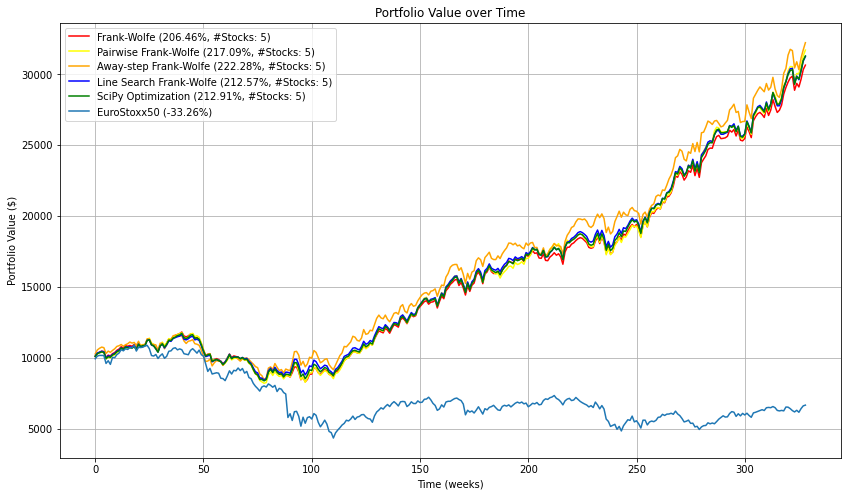

In [140]:
print(f"Index: {PORTFOLIO}")
print(f"Risk Aversion: {RISK_AVERSION}")

initial_investment = 10000

# Calcola il valore del portafoglio nel tempo
def portfolio_value(weights, matrix_ret, initial_investment):
    cumulative_returns = np.cumprod(1 + np.dot(matrix_ret, weights))
    return initial_investment * cumulative_returns

def calculate_investment_value(array_ret, initial_investment):
    # Convertiamo i ritorni percentuali in fattori moltiplicativi
    factors = 1 + np.array(array_ret)
    
    # Calcoliamo il valore cumulativo dell'investimento
    cumulative_returns = np.cumprod(factors)
    
    # Moltiplichiamo per l'investimento iniziale
    investment_value = initial_investment * cumulative_returns
    
    return investment_value

# Calcolo del numero di pesi maggiori di zero
def num_positive_weights(weights):
    return np.sum(weights > 0.0009)

# Calcola i valori del portafoglio per ciascun metodo
portfolio_values_fw = portfolio_value(optimal_weights_fw, matrix_rr, initial_investment)
portfolio_values_pw = portfolio_value(optimal_weights_pw, matrix_rr, initial_investment)
portfolio_values_aw = portfolio_value(optimal_weights_aw, matrix_rr, initial_investment)
portfolio_values_ls = portfolio_value(optimal_weights_ls, matrix_rr, initial_investment)
portfolio_values_scipy = portfolio_value(optimal_weights_scipy, matrix_rr, initial_investment)
portfolio_values_index = calculate_investment_value(array_ret, initial_investment)

# Calcola i ritorni percentuali finali
final_return_fw = (portfolio_values_fw[-1] / initial_investment - 1) * 100
final_return_pw = (portfolio_values_pw[-1] / initial_investment - 1) * 100
final_return_aw = (portfolio_values_aw[-1] / initial_investment - 1) * 100
final_return_ls = (portfolio_values_ls[-1] / initial_investment - 1) * 100
final_return_scipy = (portfolio_values_scipy[-1] / initial_investment - 1) * 100
final_return_index = (portfolio_values_index[-1] / initial_investment - 1) * 100

# Calcola il numero di pesi maggiori di zero per ciascun metodo
num_positive_fw = num_positive_weights(optimal_weights_fw)
num_positive_pw = num_positive_weights(optimal_weights_pw)
num_positive_aw = num_positive_weights(optimal_weights_aw)
num_positive_ls = num_positive_weights(optimal_weights_ls)
num_positive_scipy = num_positive_weights(optimal_weights_scipy)

# Plot dei valori del portafoglio nel tempo
plt.figure(figsize=(14, 8))
plt.plot(portfolio_values_fw, label=f'Frank-Wolfe ({final_return_fw:.2f}%, #Stocks: {num_positive_fw})', color='red')
plt.plot(portfolio_values_pw, label=f'Pairwise Frank-Wolfe ({final_return_pw:.2f}%, #Stocks: {num_positive_pw})', color='yellow')
plt.plot(portfolio_values_aw, label=f'Away-step Frank-Wolfe ({final_return_aw:.2f}%, #Stocks: {num_positive_aw})', color='orange')
plt.plot(portfolio_values_ls, label=f'Line Search Frank-Wolfe ({final_return_ls:.2f}%, #Stocks: {num_positive_ls})', color='blue')
plt.plot(portfolio_values_scipy, label=f'SciPy Optimization ({final_return_scipy:.2f}%, #Stocks: {num_positive_scipy})', color='green')
plt.plot(portfolio_values_index, label=f'{PORTFOLIO} ({final_return_index:.2f}%)')
plt.xlabel('Time (weeks)')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value over Time')
plt.legend()
plt.grid(True)
plt.show()